In [1]:
import xarray as xr
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import cartopy.crs as ccrs
import matplotlib.colors as colors
datapath='/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/MF_ML_PREDICT/case_2020_USAtor/'
models=['graphcast_','graphcast-oper','pangu_','pangu-oper','fcnv2_dawn','ifs']
references=['era','ifs_init']
figpath='/users/mfeldman/figs/spatial/'
c1='#648fff' #lightblue
c2='#785ef0' #indigo
c3='#dc267f' #magenta
c4='#fe6100' #orange
c5='#ffb000' #gold
c6='#000000' #black



In [4]:

era_ref=xr.open_dataset(datapath+'USA_tor_2020_era.nc').sortby('latitude').fillna(0)
cape=era_ref.cape.squeeze().values
wms=(cape * 2)**0.5 * era_ref.bs_06
era_ref=era_ref.assign(wms=lambda era_ref: wms)
nn=0
mm=0
for mm in range(6)[:1]:
    var=['cape','cin','bs_06','bs_03','bs_01','wms'][mm]
    tit=['CAPE [J kg$^{-1}$]','CIN [J kg$^{-1}$]','0-6km shear [m s$^{-1}$]','0-3km shear [m s$^{-1}$]',
         '0-1km shear [m s$^{-1}$]','wmax-shear [m$^2$ s$^{-2}$]'][mm]
    vm=[3000,500,55,50,30,2000][mm]
    vl=[100,10,5,1,1,100][mm]
    l1=[300,-100,10,5,5,300][mm]
    l2=[1000,-300,40,30,20,500][mm]
    f1=[1,-1,1,1,1,1][mm]

    cmd = colors.LinearSegmentedColormap.from_list('mycmap', ['#0072BC', '#FFFFFF', '#BE3825'])        
    cm= colors.LinearSegmentedColormap.from_list('mycmap', ['#FFFFFF', '#BE3825'])
    cm.set_under(color="grey")
    cm.set_bad(color="grey")
    print('making plot',var)
    levels=np.arange(100,2600,300)#np.arange(vl,vm,np.ceil(vm/20))
    p = era_ref[var].sel(latitude=slice(20,40),longitude=slice(260,290)).plot.contourf(x='longitude', y='latitude', col='time', col_wrap=4,
                transform=ccrs.PlateCarree(), subplot_kws={'projection':ccrs.PlateCarree()},
                cmap=cm,vmin=vl,vmax=vm,levels=levels,extend='both')# col_wrap=4)
    for ax in p.axs.flat:
                    ax.coastlines()
    f=p.fig
    f.savefig(figpath+'plot_era5'+'_'+var+'.png',  dpi=300, bbox_inches='tight')
    plt.close()

    # for nn in range(len(models))[:]:
    #     kw=['lat','lat','latitude','latitude','latitude','latitude'][nn]
    #     kw1=['lon','lon','longitude','longitude','longitude','longitude'][nn]
    #     kw2=['prediction_timedelta','prediction_timedelta','prediction_timedelta','prediction_timedelta','time','prediction_timedelta'][nn]
        
    #     model=models[nn]
    #     color=[c1,c2,c3,c4,c5,c6][nn]
    #     print(model)

    #     files=sorted(glob(datapath+'USA_tor_2020_'+model+'*2020*.nc'),reverse=True)
       

    #     for file in range(len(files))[:-3]:
    #         #print(file)
    #         model_set=xr.open_dataset(files[file]).sortby(kw).fillna(0).squeeze()
    #         capem=model_set.cape.squeeze().values
    #         wms=(capem * 2)**0.5 * model_set.bs_06
    #         model_set=model_set.assign(wms=lambda model_set: wms)
                        
    #         init=files[file][-13:-3]
            
            
    #         #-- Color schemes
    #         cmd = colors.LinearSegmentedColormap.from_list('mycmap', ['#0072BC', '#FFFFFF', '#BE3825'])        
    #         cm= colors.LinearSegmentedColormap.from_list('mycmap', ['#FFFFFF', '#BE3825'])
    #         cm.set_under(color="grey")
    #         cm.set_bad(color="grey")
    #         #cmd=plt.cm.RdBu
    #         #print('making plot')
    #         levels=np.arange(100,2600,300)#np.arange(vl,vm,np.ceil(vm/20))
    #         p = model_set[var].sel(**{kw: slice(20,40)},**{kw1: slice(260,290)}).plot.contourf(x=kw1, y=kw, col=kw2, col_wrap=4,
    #                     transform=ccrs.PlateCarree(), subplot_kws={'projection':ccrs.PlateCarree()},
    #                     cmap=cm,vmin=vl,vmax=vm,levels=levels,extend='both')# col_wrap=4)
    #         for ax in p.axs.flat:
    #                         ax.coastlines()
    #         f=p.fig
    #         f.savefig(figpath+'plot_'+model+'_'+init+'_'+var+'.png',  dpi=300, bbox_inches='tight')
    #         plt.close()
            
    #         #print('computing delta')
    #         d_model_set = model_set[var].sel(**{kw: slice(20,40)},**{kw1: slice(260,290)}).squeeze() - \
    #                         era_ref[var].sel(latitude=slice(20,40),longitude=slice(260,290)).squeeze().values
                
    #         #print('making plot')
    #         levels=np.append(np.arange(-2500,-90,300),levels)
    #         #levels=np.delete(np.arange(-vm,vm+np.ceil(2*vm/20),np.ceil(2*vm/20)),10)#
    #         p = d_model_set.plot.contourf(x=kw1, y=kw, col=kw2, col_wrap=4,
    #                     transform=ccrs.PlateCarree(), subplot_kws={'projection':ccrs.PlateCarree()},
    #                     cmap=cmd,vmin=-vm,vmax=vm,levels=levels,extend='both')# col_wrap=4)
    #         for ax in p.axs.flat:
    #                         ax.coastlines()
    #         f=p.fig
    #         f.savefig(figpath+'deltaplot_'+model+'_'+init+'_'+var+'.png',  dpi=300, bbox_inches='tight')
    #         plt.close()
            
    #         # p = d_model_set[var].sel(latitude=slice(20,40),longitude=slice(260,290)).plot(x="longitude", y="latitude", col="time", col_wrap=4,transform=ccrs.PlateCarree(), subplot_kws={'projection':ccrs.PlateCarree()}\
    #         #             ,cmap=cmd,vmin=-vm,vmax=vm,levels=np.arange(-vm,vm,int(2*vm/20)),extend='both')# col_wrap=4)
    #         # for ax in p.axs.flat:
    #         #                 ax.coastlines()
    #         # f=p.fig
    #         # f.savefig(figpath+'/spatial/deltaplot_'+model+'_'+init+'_'+var+'.png',  dpi=300, bbox_inches='tight')
    #         # plt.close()





making plot cape


In [9]:
levels=np.delete(np.arange(-vm,vm+np.ceil(2*vm/20),np.ceil(2*vm/20)),10)
print(levels)

[-500. -450. -400. -350. -300. -250. -200. -150. -100.  -50.   50.  100.
  150.  200.  250.  300.  350.  400.  450.  500.]


In [17]:
era_ref=xr.open_dataset(datapath+'USA_tor_2020_era.nc').sortby('latitude').fillna(0).sel(latitude=slice(20,40),longitude=slice(260,290))
cape=era_ref.cape.squeeze().values
wms=(cape * 2)**0.5 * era_ref.bs_06
era_ref=era_ref.assign(wms=lambda era_ref: wms)
np.nanmin(era_ref.wms)

0.0

In [18]:
year=2020; month=4; day=np.arange(12,14,1); days=day[0]-np.arange(1,10)
#EVENT SELECTION ERA5
era5='gs://weatherbench2/datasets/era5/1959-2022-6h-1440x721.zarr'
xr_era5=xr.open_zarr(era5).sortby('latitude')#.fillna(0)
xr_era5=xr_era5.sel(time=xr_era5.time.dt.year.isin([year]))
xr_era5=xr_era5.sel(time=xr_era5.time.dt.month.isin([month]))#np.arange(3,10)))
xr_era5=xr_era5.sel(time=xr_era5.time.dt.day.isin([day]),latitude=slice(20,40),longitude=slice(260,290))

making plot


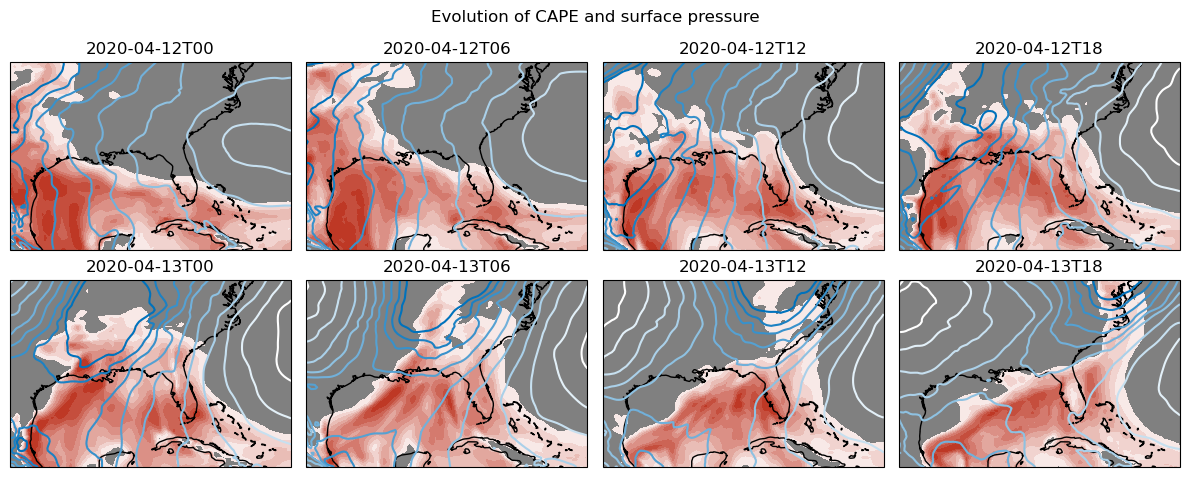

In [21]:
cm= colors.LinearSegmentedColormap.from_list('mycmap', ['#FFFFFF', '#BE3825'])
cm.set_under(color="grey")
cm.set_bad(color="grey")
cmd = colors.LinearSegmentedColormap.from_list('mycmap', ['#0072BC', '#FFFFFF'])  
print('making plot')
n=0
projection = ccrs.PlateCarree()
era_ref=era_ref.assign(mean_sea_level_pressure=lambda era_ref: xr_era5.mean_sea_level_pressure)
fig2,axes2 = plt.subplots(2,4,figsize=(12, 5), subplot_kw={'projection':ccrs.PlateCarree()})
axs_flat = axes2.flatten()
for i, ax in enumerate(axs_flat):
    data=era_ref.isel(time=n)

    contour_plot=data.cape.plot.contourf(ax=ax, transform=projection,x='longitude', y='latitude',
        cmap=cm,vmin=100,vmax=2500,levels=np.arange(100,2600,300),extend='both', add_colorbar=False)

    data.mean_sea_level_pressure.plot.contour(ax=ax, transform=projection, x='longitude', y='latitude',
         cmap=cmd,vmin=100000,vmax=103000,levels=np.arange(100000,103000,300),extend='both')


    ax.coastlines()
    ax.set_title('') # to supress xarray auto-title
    ax.set_title(np.datetime_as_string(data.time.values,unit='h'));
    n+=1
# cbar = fig2.colorbar(contour_plot, ax=axes2, orientation='horizontal', shrink=0.8)
# cbar.set_label('CAPE [J kg$^{-1}$]')
fig2.suptitle('Evolution of CAPE and surface pressure')
plt.tight_layout()
fig2.savefig(figpath+'plot_era5_cape_msl.png',  dpi=300, bbox_inches='tight')

In [31]:
np.datetime_as_string(data.time.values,unit='h')

'2020-04-13T18'

In [2]:
year=2020; month=4; day=np.arange(12,18,1); days=day[0]-np.arange(1,10)
#EVENT SELECTION ERA5
era5='gs://weatherbench2/datasets/era5/1959-2022-6h-1440x721.zarr'
xr_era5=xr.open_zarr(era5).sortby('latitude')#.fillna(0)
xr_era5=xr_era5.sel(time=xr_era5.time.dt.year.isin([year]))
xr_era5=xr_era5.sel(time=xr_era5.time.dt.month.isin([month]))#np.arange(3,10)))
lon_name='longitude'
xr_era5['_longitude_adjusted'] = xr.where(
    xr_era5[lon_name] > 180,
    xr_era5[lon_name] - 360,
    xr_era5[lon_name])
xr_era5 = (
    xr_era5
    .swap_dims({lon_name: '_longitude_adjusted'})
    .sel(**{'_longitude_adjusted': sorted(xr_era5._longitude_adjusted)})
    .drop(lon_name))
xr_era5 = xr_era5.rename({'_longitude_adjusted': lon_name})
xr_era5=xr_era5.sel(time=xr_era5.time.dt.day.isin([day]),latitude=slice(20,75),longitude=slice(-100,60))

year=2020; month=4; day=np.arange(12,18,1); days=day[0]-np.arange(1,10)
#EVENT SELECTION ERA5
era5_clim='gs://weatherbench2/datasets/era5-hourly-climatology/1990-2019_6h_1440x721.zarr'
xr_clim=xr.open_zarr(era5_clim).sortby('latitude')#.fillna(0)

lon_name='longitude'
xr_clim['_longitude_adjusted'] = xr.where(
    xr_clim[lon_name] > 180,
    xr_clim[lon_name] - 360,
    xr_clim[lon_name])
xr_clim = (
    xr_clim
    .swap_dims({lon_name: '_longitude_adjusted'})
    .sel(**{'_longitude_adjusted': sorted(xr_clim._longitude_adjusted)})
    .drop(lon_name))
xr_clim = xr_clim.rename({'_longitude_adjusted': lon_name})
xr_clim=xr_clim.sel(latitude=slice(20,75),longitude=slice(-100,60))
xr_clim=xr_clim.sel(dayofyear=np.arange(72,78,1))

/tmp/ipykernel_3724346/2389865983.py:16: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  .drop(lon_name))
/tmp/ipykernel_3724346/2389865983.py:34: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  .drop(lon_name))


In [3]:
xr_clim1=xr_clim.stack(time=('dayofyear','hour'), create_index=False).transpose('time', 'latitude', 'longitude', 'level')

In [4]:
# xr_clim1.time=xr_era5.time.values
xr_clim1 = xr_clim1.assign_coords(time=xr_era5.time.values)
print("Original dimensions:", xr_clim1.dims)
xr_clim2 = xr_clim1.transpose('time',...)
print("New dimensions:", xr_clim2.dims)

Original dimensions: FrozenMappingWarningOnValuesAccess({'time': 24, 'latitude': 221, 'longitude': 641, 'level': 13})
New dimensions: FrozenMappingWarningOnValuesAccess({'time': 24, 'latitude': 221, 'longitude': 641, 'level': 13})


In [7]:
print("Original dimensions:", xr_era5.dims)
xr_era5_1 = xr_era5.transpose('time', 'latitude', 'longitude', 'level')
print("New dimensions:", xr_era5_1.dims)

Original dimensions: FrozenMappingWarningOnValuesAccess({'time': 24, 'latitude': 221, 'longitude': 641, 'level': 13})
New dimensions: FrozenMappingWarningOnValuesAccess({'time': 24, 'latitude': 221, 'longitude': 641, 'level': 13})


In [9]:
print("New dimensions:", xr_clim1.dims)
print("New dimensions:", xr_clim2.dims)
print("New dimensions:", xr_era5.dims)
print("New dimensions:", xr_era5_1.dims)

New dimensions: FrozenMappingWarningOnValuesAccess({'time': 24, 'latitude': 221, 'longitude': 641, 'level': 13})
New dimensions: FrozenMappingWarningOnValuesAccess({'time': 24, 'latitude': 221, 'longitude': 641, 'level': 13})
New dimensions: FrozenMappingWarningOnValuesAccess({'time': 24, 'latitude': 221, 'longitude': 641, 'level': 13})
New dimensions: FrozenMappingWarningOnValuesAccess({'time': 24, 'latitude': 221, 'longitude': 641, 'level': 13})


In [12]:
xr_era5['d_mslp']=xr_era5_1.mean_sea_level_pressure-xr_clim2.mean_sea_level_pressure.values
xr_era5['d_z']=xr_era5_1.geopotential-xr_clim2.geopotential.values
xr_era5['d_t2m']=xr_era5_1['2m_temperature']-xr_clim2['2m_temperature']

making plot


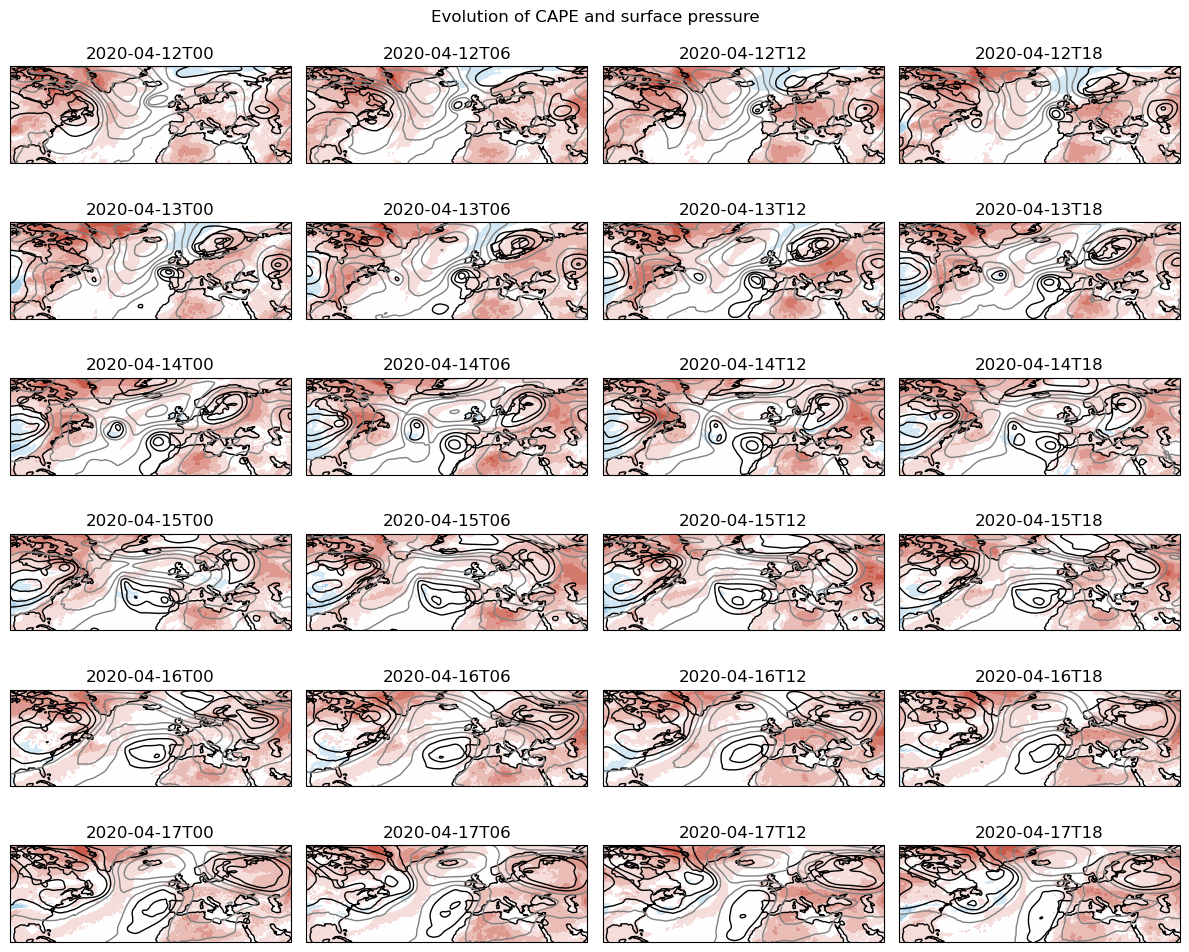

In [26]:
cm= colors.LinearSegmentedColormap.from_list('mycmap', ['#FFFFFF', '#BE3825'])
cm.set_under(color="grey")
cm.set_bad(color="grey")
cmd2 = colors.LinearSegmentedColormap.from_list('mycmap', ['#0072BC','#7393B3','#D3D3D3'])#  '#000000']) 
cmd2 = colors.LinearSegmentedColormap.from_list('mycmap', ['#000000','#D3D3D3'])
cmd = colors.LinearSegmentedColormap.from_list('mycmap', ['#0072BC', '#FFFFFF', '#BE3825'])      
print('making plot')
n=0
projection = ccrs.PlateCarree()
#era_ref=era_ref.assign(mean_sea_level_pressure=lambda era_ref: xr_era5.mean_sea_level_pressure)
fig2,axes2 = plt.subplots(6,4,figsize=(12, 10), subplot_kw={'projection':ccrs.PlateCarree()})
axs_flat = axes2.flatten()
for i, ax in enumerate(axs_flat):
    data=xr_era5.isel(time=n)

    contour_plot=data.d_t2m.plot.contourf(ax=ax, transform=projection,x='longitude', y='latitude',
        cmap=cmd,vmin=-20,vmax=20,levels=np.arange(-22,24,4),extend='both', add_colorbar=False)

    # d2=data.d_mslp.plot.contour(ax=ax, transform=projection, x='longitude', y='latitude',
    #      cmap='PuOr',vmin=-3000,vmax=3000,levels=np.arange(-3300,3600,600),extend='both', add_colorbar=False)
    d2=data.d_z.sel(level=500).plot.contour(ax=ax, transform=projection, x='longitude', y='latitude',
         colors=['black','black','black','black','black','black','grey','grey','grey','grey','grey','grey'],vmin=-1,vmax=1,levels=np.arange(-4400,4600,800),linewidths=1, add_colorbar=False)


    ax.coastlines()
    ax.set_title('') # to supress xarray auto-title
    ax.set_title(np.datetime_as_string(data.time.values,unit='h'));
    n+=1
# cbar = fig2.colorbar(contour_plot, ax=axes2, orientation='horizontal', shrink=0.8)
# cbar.set_label('temperature anomaly [°C]')
# cbar = fig2.colorbar(d2, ax=axes2, orientation='vertical', shrink=0.8)
# cbar.set_label('pressure [Pa]')
fig2.suptitle('Evolution of CAPE and surface pressure')
plt.tight_layout()
fig2.savefig(figpath+'plot_era5_t2m_z500_ext.png',  dpi=300, bbox_inches='tight')

making plot


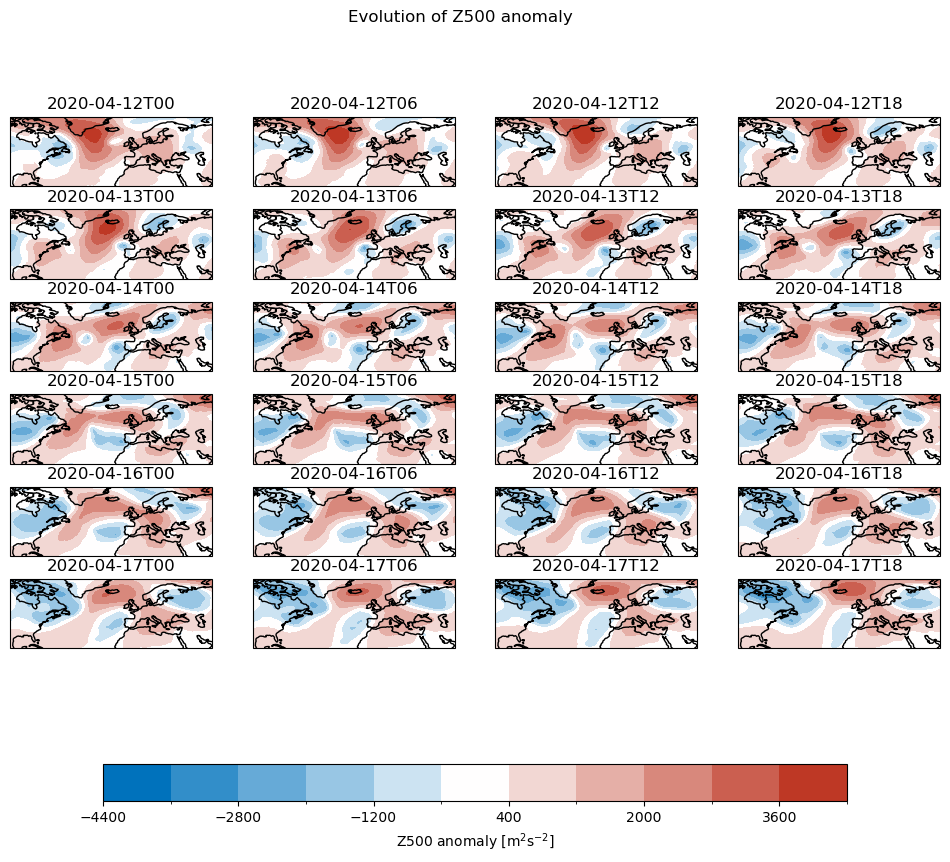

In [31]:
cm= colors.LinearSegmentedColormap.from_list('mycmap', ['#FFFFFF', '#BE3825'])
cm.set_under(color="grey")
cm.set_bad(color="grey")
cmd2 = colors.LinearSegmentedColormap.from_list('mycmap', ['#0072BC','#7393B3','#D3D3D3'])#  '#000000']) 
cmd2 = colors.LinearSegmentedColormap.from_list('mycmap', ['#000000','#D3D3D3'])
cmd = colors.LinearSegmentedColormap.from_list('mycmap', ['#0072BC', '#FFFFFF', '#BE3825'])      
print('making plot')
n=0
projection = ccrs.PlateCarree()
#era_ref=era_ref.assign(mean_sea_level_pressure=lambda era_ref: xr_era5.mean_sea_level_pressure)
fig2,axes2 = plt.subplots(6,4,figsize=(12, 10), subplot_kw={'projection':ccrs.PlateCarree()})
axs_flat = axes2.flatten()
for i, ax in enumerate(axs_flat):
    data=xr_era5.isel(time=n)

    d2=data.d_z.sel(level=500).plot.contourf(ax=ax, transform=projection, x='longitude', y='latitude',
         cmap=cmd,vmin=-1,vmax=1,levels=np.arange(-4400,4600,800), add_colorbar=False)


    ax.coastlines()
    ax.set_title('') # to supress xarray auto-title
    ax.set_title(np.datetime_as_string(data.time.values,unit='h'));
    n+=1
cbar = fig2.colorbar(d2, ax=axes2, orientation='horizontal', shrink=0.8)
cbar.set_label('Z500 anomaly [m$^2$s$^{-2}$]')
# cbar = fig2.colorbar(d2, ax=axes2, orientation='vertical', shrink=0.8)
# cbar.set_label('pressure [Pa]')
fig2.suptitle('Evolution of Z500 anomaly')
# plt.tight_layout()
fig2.savefig(figpath+'plot_era5_z500_ext_cbar.png',  dpi=300, bbox_inches='tight')

making plot


/work/FAC/FGSE/IDYST/tbeucler/default/mfeldman/miniforge3/envs/wb/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)
/work/FAC/FGSE/IDYST/tbeucler/default/mfeldman/miniforge3/envs/wb/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)
/work/FAC/FGSE/IDYST/tbeucler/default/mfeldman/miniforge3/envs/wb/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)
/work/FAC/FGSE/IDYST/tbeucler/default/mfeldman/miniforge3/envs/wb/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)
/work/FAC/FGSE/IDYST/tbeucler/default/mfeldman/miniforge3/envs/wb/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning:

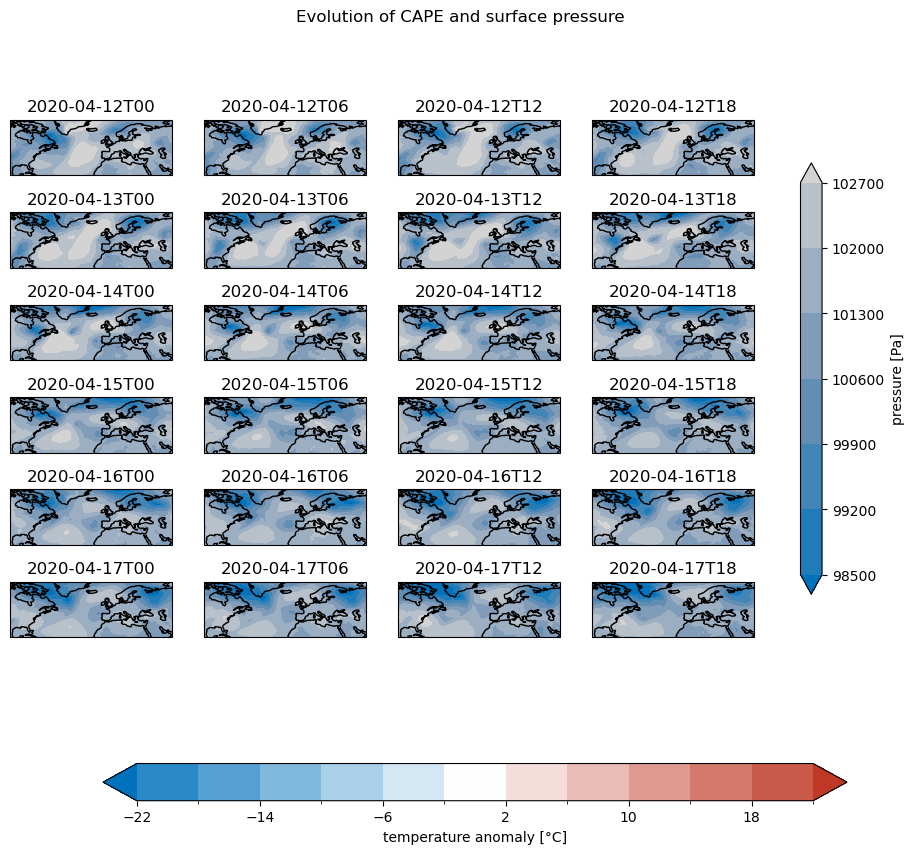

In [109]:
cm= colors.LinearSegmentedColormap.from_list('mycmap', ['#FFFFFF', '#BE3825'])
cm.set_under(color="grey")
cm.set_bad(color="grey")
cmd2 = colors.LinearSegmentedColormap.from_list('mycmap', ['#0072BC','#7393B3','#D3D3D3'])#  '#000000']) 
cmd = colors.LinearSegmentedColormap.from_list('mycmap', ['#0072BC', '#FFFFFF', '#BE3825'])      
print('making plot')
n=0
projection = ccrs.PlateCarree()
#era_ref=era_ref.assign(mean_sea_level_pressure=lambda era_ref: xr_era5.mean_sea_level_pressure)
fig2,axes2 = plt.subplots(6,4,figsize=(12, 10), subplot_kw={'projection':ccrs.PlateCarree()})
axs_flat = axes2.flatten()
for i, ax in enumerate(axs_flat):
    data=xr_era5.isel(time=n)

    contour_plot=data.d_t2m.plot.contourf(ax=ax, transform=projection,x='longitude', y='latitude',
        cmap=cmd,vmin=-20,vmax=20,levels=np.arange(-22,24,4),extend='both', add_colorbar=False)

    # d2=data.d_mslp.plot.contour(ax=ax, transform=projection, x='longitude', y='latitude',
    #      cmap='PuOr',vmin=-3000,vmax=3000,levels=np.arange(-3300,3600,600),extend='both', add_colorbar=False)
    d2=data.mean_sea_level_pressure.plot.contourf(ax=ax, transform=projection, x='longitude', y='latitude',
         cmap=cmd2,vmin=98500,vmax=103000,levels=np.arange(98500,103000,700),extend='both',linewidths=1, add_colorbar=False)


    ax.coastlines()
    ax.set_title('') # to supress xarray auto-title
    ax.set_title(np.datetime_as_string(data.time.values,unit='h'));
    n+=1
cbar = fig2.colorbar(contour_plot, ax=axes2, orientation='horizontal', shrink=0.8)
cbar.set_label('temperature anomaly [°C]')
cbar = fig2.colorbar(d2, ax=axes2, orientation='vertical', shrink=0.8)
cbar.set_label('pressure [Pa]')
fig2.suptitle('Evolution of CAPE and surface pressure')
# plt.tight_layout()
fig2.savefig(figpath+'plot_era5_t2m_msl2_ext_cbar.png',  dpi=300, bbox_inches='tight')

In [56]:
np.nanmax(data.d_t2m)

-11.0529785

making plot


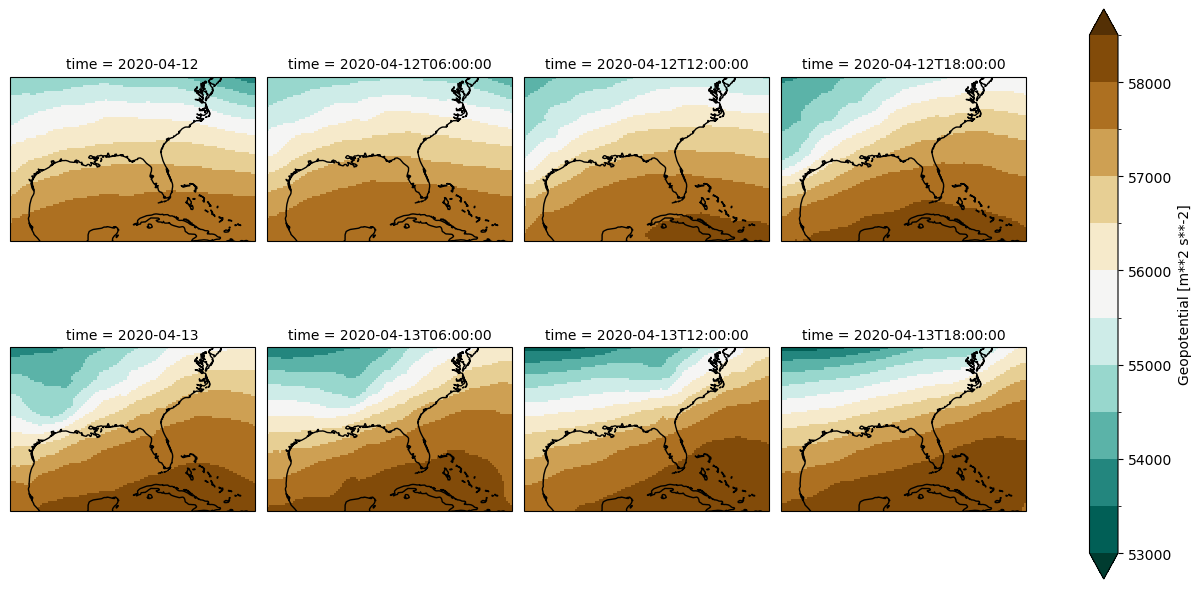

In [22]:
cm=plt.cm.Reds
cm.set_under(color="grey")
cm.set_bad(color="grey")
cmd=plt.cm.BrBG_r
print('making plot')
p = xr_era5.geopotential.sel(level=500,latitude=slice(20,40),longitude=slice(260,290)).plot(x='longitude', y='latitude', col='time', col_wrap=4,
            transform=ccrs.PlateCarree(), subplot_kws={'projection':ccrs.PlateCarree()},
            cmap=cmd,vmin=53000,vmax=59000,levels=np.arange(53000,59000,500),extend='both')# col_wrap=4)
for ax in p.axs.flat:
                ax.coastlines()
f=p.fig
f.savefig(figpath+'plot_era5_z500.png',  dpi=300, bbox_inches='tight')

making plot


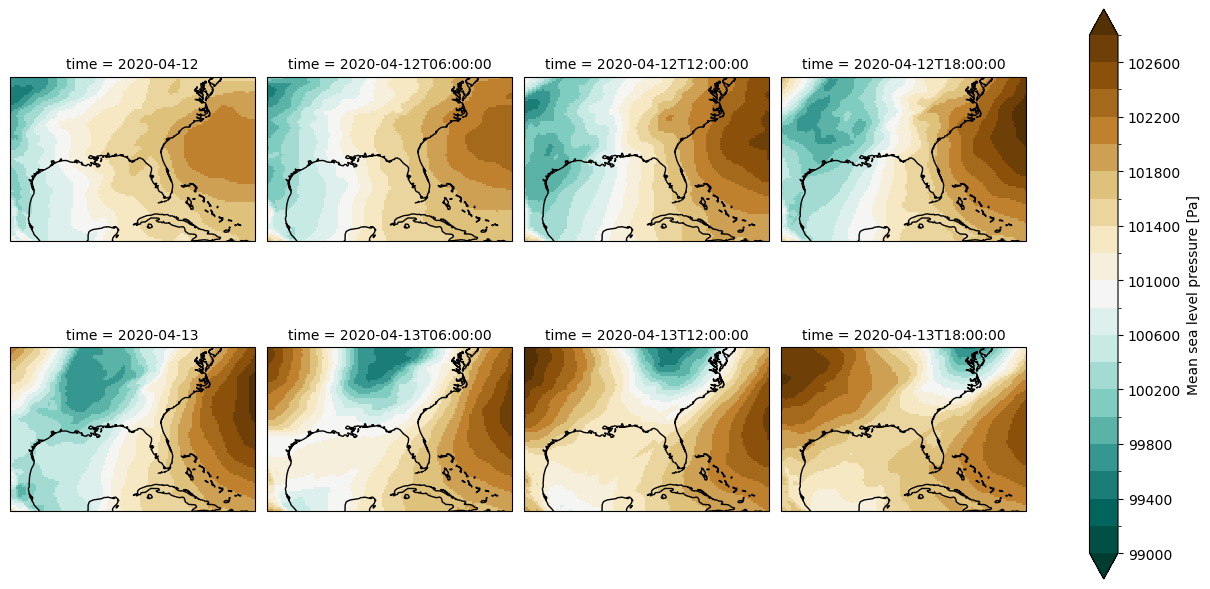

In [10]:
cm=plt.cm.Reds
cm.set_under(color="grey")
cm.set_bad(color="grey")
cmd=plt.cm.BrBG_r
print('making plot')
p = xr_era5.mean_sea_level_pressure.sel(latitude=slice(20,40),longitude=slice(260,290)).plot(x='longitude', y='latitude', col='time', col_wrap=4,
            transform=ccrs.PlateCarree(), subplot_kws={'projection':ccrs.PlateCarree()},
            cmap=cmd,vmin=99000,vmax=103000,levels=np.arange(99000,103000,200),extend='both')# col_wrap=4)
for ax in p.axs.flat:
                ax.coastlines()
f=p.fig
f.savefig(figpath+'plot_era5_msl.png',  dpi=300, bbox_inches='tight')

making plot


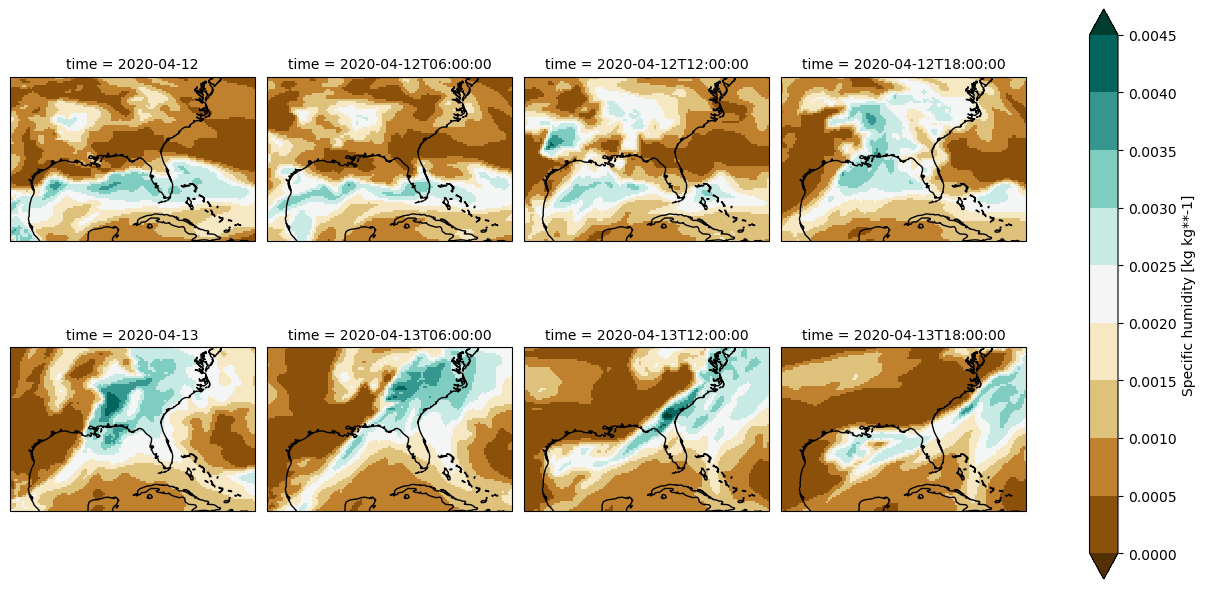

In [17]:
cm=plt.cm.Reds
cm.set_under(color="grey")
cm.set_bad(color="grey")
cmd=plt.cm.BrBG
print('making plot')
p = xr_era5.specific_humidity.sel(level=500,latitude=slice(20,40),longitude=slice(260,290)).plot(x='longitude', y='latitude', col='time', col_wrap=4,
            transform=ccrs.PlateCarree(), subplot_kws={'projection':ccrs.PlateCarree()},
            cmap=cmd,vmin=0,vmax=0.005,levels=np.arange(0,0.005,0.0005),extend='both')# col_wrap=4)
for ax in p.axs.flat:
                ax.coastlines()
f=p.fig
f.savefig(figpath+'plot_era5_q500.png',  dpi=300, bbox_inches='tight')

In [24]:
np.nanmax(xr_era5.temperature.sel(level=500,latitude=slice(20,40),longitude=slice(260,290)))

271.4873

making plot


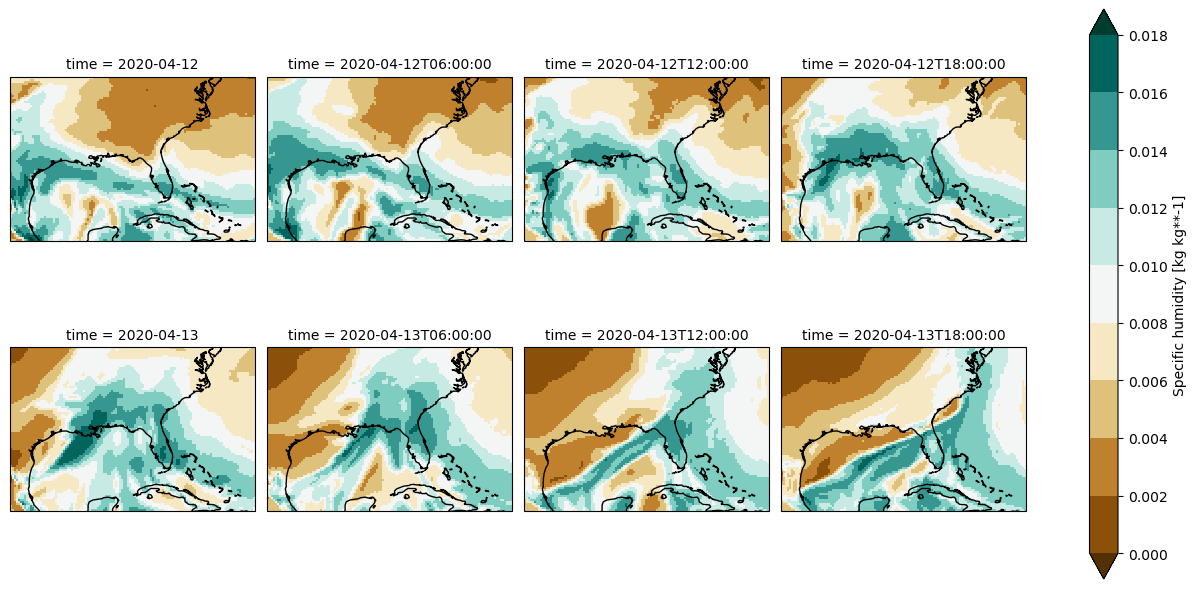

In [18]:
cm=plt.cm.Reds
cm.set_under(color="grey")
cm.set_bad(color="grey")
cmd=plt.cm.BrBG
print('making plot')
p = xr_era5.specific_humidity.sel(level=925,latitude=slice(20,40),longitude=slice(260,290)).plot(x='longitude', y='latitude', col='time', col_wrap=4,
            transform=ccrs.PlateCarree(), subplot_kws={'projection':ccrs.PlateCarree()},
            cmap=cmd,vmin=0,vmax=0.02,levels=np.arange(0,0.02,0.002),extend='both')# col_wrap=4)
for ax in p.axs.flat:
                ax.coastlines()
f=p.fig
f.savefig(figpath+'plot_era5_q925.png',  dpi=300, bbox_inches='tight')

making plot


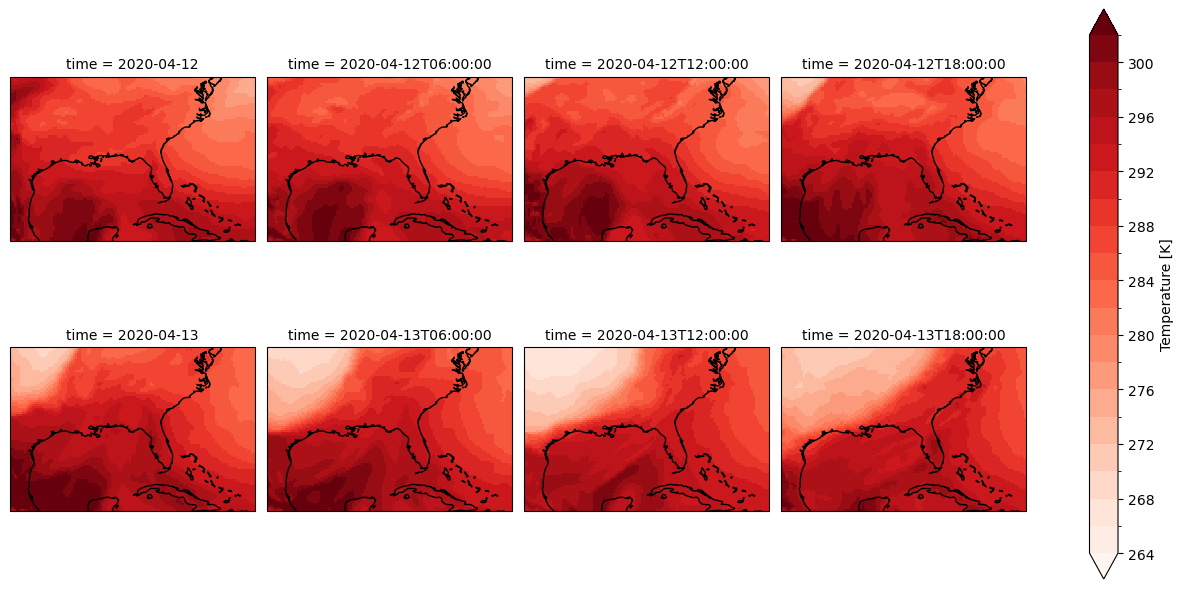

In [3]:
cm=plt.cm.Reds
cmd=plt.cm.BrBG
print('making plot')
p = xr_era5.temperature.sel(level=925,latitude=slice(20,40),longitude=slice(260,290)).plot(x='longitude', y='latitude', col='time', col_wrap=4,
            transform=ccrs.PlateCarree(), subplot_kws={'projection':ccrs.PlateCarree()},
            cmap=cm,vmin=265,vmax=303,levels=np.arange(264,303,2),extend='both')# col_wrap=4)
for ax in p.axs.flat:
                ax.coastlines()
f=p.fig
f.savefig(figpath+'plot_era5_t925.png',  dpi=300, bbox_inches='tight')

making plot


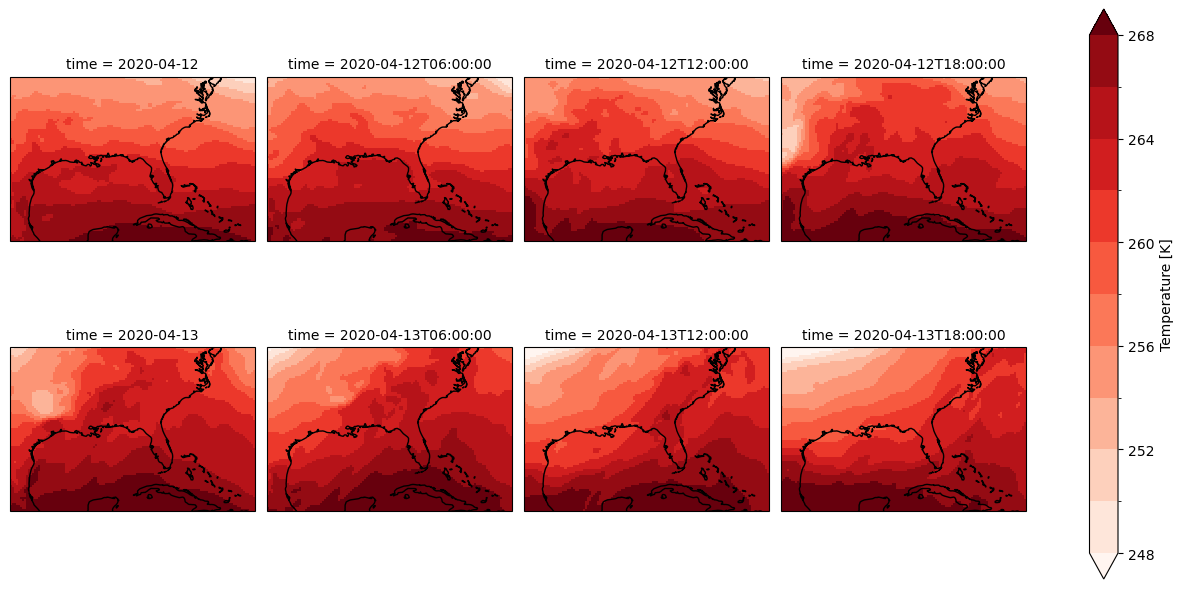

In [4]:
cm=plt.cm.Reds
cmd=plt.cm.BrBG
print('making plot')
p = xr_era5.temperature.sel(level=500,latitude=slice(20,40),longitude=slice(260,290)).plot(x='longitude', y='latitude', col='time', col_wrap=4,
            transform=ccrs.PlateCarree(), subplot_kws={'projection':ccrs.PlateCarree()},
            cmap=cm,vmin=248,vmax=269,levels=np.arange(248,269,2),extend='both')# col_wrap=4)
for ax in p.axs.flat:
                ax.coastlines()
f=p.fig
f.savefig(figpath+'plot_era5_t500.png',  dpi=300, bbox_inches='tight')